In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import json

In [13]:
with open('/Users/nhu2000/desktop/huizhou/data/stop_words/Baidu_Stop_Words.json') as data_file:    
    data = json.load(data_file)
bd_stop_words = list(data)

In [6]:
df = pd.read_csv('/Users/nhu2000/Desktop/huizhou/data/huiwenhua/huizhou_web_contentv5.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8768 entries, 0 to 8767
Data columns (total 9 columns):
url          8768 non-null object
domain       8768 non-null object
title        8768 non-null object
segment      8768 non-null object
key_words    8768 non-null object
summary      8768 non-null object
body         8768 non-null object
target       8768 non-null int64
combined     8768 non-null object
dtypes: int64(1), object(8)
memory usage: 685.0+ KB


In [8]:
df_final = df[df['domain'] != 'wuyuan168.com']
df_final = df_final.dropna(subset =['key_words'])
df_final = df_final[df_final['target'] == 1]

In [9]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4979 entries, 1 to 8668
Data columns (total 9 columns):
url          4979 non-null object
domain       4979 non-null object
title        4979 non-null object
segment      4979 non-null object
key_words    4979 non-null object
summary      4979 non-null object
body         4979 non-null object
target       4979 non-null int64
combined     4979 non-null object
dtypes: int64(1), object(8)
memory usage: 389.0+ KB


In [10]:
df_final['combined'] = df_final['segment'] + df_final['key_words']

In [11]:
train_articles = df_final['combined']

In [22]:
vectorizer = TfidfVectorizer(analyzer = 'word', stop_words = bd_stop_words)
tfidf_matrix = vectorizer.fit_transform(train_articles)
terms = vectorizer.get_feature_names()

In [33]:
print terms[520]

一经


In [34]:
vocab_frame = pd.DataFrame({'words': terms})

In [36]:
vocab_frame.head(200)

,words
0,10
1,100
2,1000
3,11
4,112
5,114
6,116
7,118
8,12
9,120


In [54]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)

In [56]:
from sklearn.cluster import KMeans
num_clusters = 10
km = KMeans(n_clusters=num_clusters)

In [57]:
km.fit(tfidf_matrix)
clusters = km.labels_.tolist()

In [58]:
df_final['cluster'] = clusters

In [59]:
#pd.value_counts(df_final['cluster'].values, sort=True)
df_final['cluster'].value_counts()

2    1610
3    1288
1     518
4     475
6     353
5     268
8     192
9     138
0     101
7      36
Name: cluster, dtype: int64

In [60]:
print len(clusters)

4979


In [61]:
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

for i in range(num_clusters):
    print("Cluster %d words:" % i)
    
    for ind in order_centroids[i, :20]: #replace 6 with n words per cluster
        print terms[ind]       
        #print(' %s' % vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'))
    print() #add whitespace
    print() #add whitespace
    

Cluster 0 words:
徽剧
徽班
京剧
徽调
四喜
进京
戏曲
春台
艺术
剧种
戏剧
京剧院
声腔
演出
春班
吹腔
安徽
青阳腔
中国
徽戏
()
()
Cluster 1 words:
文化
徽州
徽文化
保护
徽学
研究
黄山
黄山市
旅游
生态
历史
徽派
传承
博物馆
古民居
古村落
文化遗产
发展
学术
安徽
()
()
Cluster 2 words:
歙县
休宁
黟县
婺源
新安
休宁县
屯溪
黄山
医学
安徽
宣城
安徽省
宣纸
万安
村落
毛峰
徽菜
西递
中国
黄山市
()
()
Cluster 3 words:
徽州
文化
故园
歙县
黄山
原创
新安
历史
明清
宗族
屯溪
黄山市
休宁
徽州区
社会
明代
婺源
女人
徽文化
文书
()
()
Cluster 4 words:
徽商
经营
大会
徽州
经商
商人
文化
商业
明清
发展
精神
商帮
银行
歙县
安徽
中国
儒商
资本
家族
行业
()
()
Cluster 5 words:
徽派
建筑
木雕
徽州
雕刻
艺术
民居
古建筑
版画
古建
装饰
砖雕
古民居
传承
文化
传统
三雕
石雕
作品
博古
()
()
Cluster 6 words:
绩溪
胡适
绩溪县
徽州
文化
龙川
徽菜
先生
历史
胡氏
徽商
故居
安徽
中国
徽墨
陶行知
婺源
上庄
西关
思想
()
()
Cluster 7 words:
道理
人人
一份
多出
手艺
吸附
身处
有着
感受
手艺人
切肤之痛
六年
文武
清光绪
嘉定
自宋
十年
状元
休宁
变革时代
()
()
Cluster 8 words:
祁门
祁门县
祁红
祁门红
芦溪
芦溪乡
红茶
安徽
历溪
祠堂
牯牛
旅游
徽州
茶叶
新局
文化
安茶
景德镇
瓷土
黄山
()
()
Cluster 9 words:
民俗
汪华
汪公
徽州
汪王
越国公
文化
歙县
活动
绩溪
文化节
正月
诞辰
徽菜
周年
赛琼碗
百姓
旅游节
民间
古城
()
()


In [45]:
print ind, vocab_frame.ix[terms[ind].split(' ')].values.tolist()

 17493 [[nan]]


In [62]:
#Multidimensional scaling
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS


In [63]:
MDS()

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]
print()
print()

()
()


In [67]:
#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e',
                  5: '#fb9e77', 6: '#f95f02', 7: '#f570b3', 8: '#f7298a', 9: '#a4a4a4',
                 }

#set up cluster names using a dict
cluster_names = {0: 'Cluster 0', 
                 1: 'Cluster 1', 
                 2: 'Cluster 2', 
                 3: 'Cluster 3', 
                 4: 'Cluster 4',
                 5: 'Cluster 5', 
                 6: 'Cluster 6', 
                 7: 'Cluster 7', 
                 8: 'Cluster 8',
                 9: 'Cluster 9'
                 }

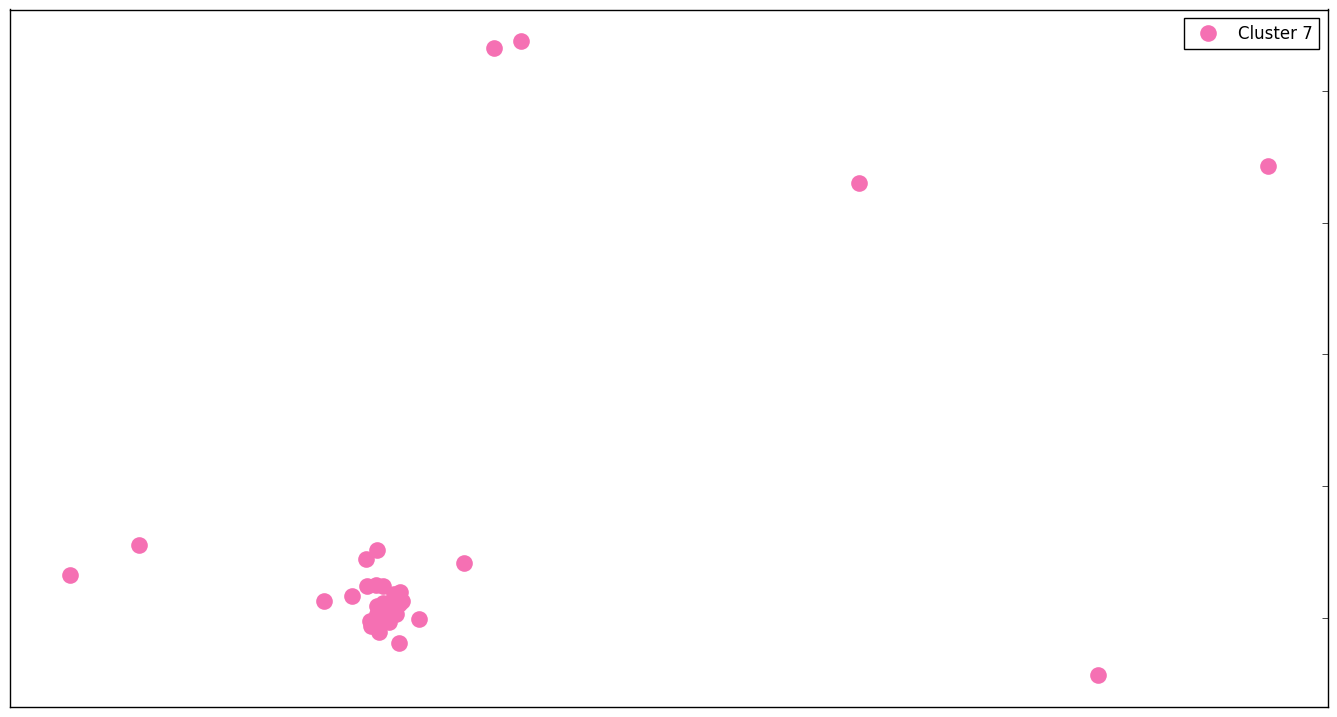

In [89]:
#some ipython magic to show the matplotlib plots inline
%matplotlib inline 

#create data frame that has the result of the MDS plus the cluster numbers and titles
#df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=titles)) 
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters)) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

idx = 0
#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    if idx == 7:
        ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
                label=cluster_names[name], color=cluster_colors[name], 
                mec='none')
        ax.set_aspect('auto')
        ax.tick_params(\
            axis= 'x',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom='off',      # ticks along the bottom edge are off
            top='off',         # ticks along the top edge are off
            labelbottom='off')
        ax.tick_params(\
            axis= 'y',         # changes apply to the y-axis
            which='both',      # both major and minor ticks are affected
            left='off',      # ticks along the bottom edge are off
            top='off',         # ticks along the top edge are off
            labelleft='off')
    idx += 1 
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
#for i in range(len(df)):
#    ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=8)  
#    ax.text(df.ix[i]['x'], df.ix[i]['y'], size=8)  #Not draw the titles

    
    
plt.show() #show the plot

#uncomment the below to save the plot if need be
#plt.savefig('clusters_small_noaxes.png', dpi=200)